# Implementación de PCA en NumPy

## Objetivos
* Implementación de PCA en NumPy paso a paso
* Comparación de resultados con Scikit-learn

## Implementación

1. Dado un dataset $X \in \mathbb{R}^{n, d}$, con $n$ muestras y $d$ features, queremos reducir sus dimensiones a $m$. Para ello, el primer paso es centrar el dataset (Hint: usen np.mean)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
X = np.array( [ [0.8, 0.7] , [0.1, -0.1]] )
mu = np.mean(X,axis=0)
X = X-mu


2. Obtener la matriz de covarianza de $X^T$, revisar en la teoría por qué utilizamos la transpuesta. Buscar en la documentación de NumPy qué funciones se pueden utilizar.

In [ ]:
S = np.cov(X.T,bias=True)
print(S)


[[0.1225 0.14  ]
 [0.14   0.16  ]]


3. Calcular los autovalores y autovectores de la matriz de covarianza. Revisar la documentación de NumPy.

In [ ]:
"""
The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
"""

A = np.linalg.eig(S)
print(A)



(array([2.77555756e-17, 2.82500000e-01]), array([[-0.75257669, -0.65850461],
       [ 0.65850461, -0.75257669]]))


4. Ordernar los autovectores en el sentido de los autovalores decrecientes, revisar la teoría de ser necesario.

(array([2.77555756e-17, 2.82500000e-01]), array([[-0.75257669, -0.65850461],
       [ 0.65850461, -0.75257669]]))
[[-0.65850461 -0.75257669]
 [-0.75257669  0.65850461]]


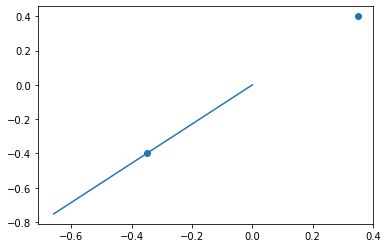

In [ ]:
print(A)
idx = np.argsort(A[0])
idx = idx[::-1]
eigen_vectors = A[1].T
eigen_vectors_sorted = eigen_vectors[idx]
print(eigen_vectors_sorted)

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.plot([0,eigen_vectors_sorted[0][0]],[0,eigen_vectors_sorted[0][1]])
plt.show()

5. Proyectar el dataset centrado sobre los $m$ autovectores más relevantes (Hint: usen np.dot).

In [ ]:
X_PCA_transform_np = np.dot(eigen_vectors_sorted[0],X.T)
print(X_PCA_transform_np)

[-0.53150729  0.53150729]


6. Consolidar los pasos anteriores en una función o clase PCA.

In [62]:
def pca_np(X,n_components = 1):
  mu = np.mean(X,axis=0)
  X = X-mu  
  S = np.cov(X.T,bias=True)
  A = np.linalg.eig(S)
  idx = np.argsort(A[0])
  idx = idx[::-1]
  eigen_vectors = A[1].T
  eigen_vectors_sorted = eigen_vectors[idx]
  X_PCA_transform_np = np.dot(eigen_vectors_sorted[0:n_components],X.T).T
  return X_PCA_transform_np

X_PCA_transform_np = pca_np(X)
print(X_PCA_transform_np)


[[-0.53150729]
 [ 0.53150729]]


7. Comparar los resultados obtenidos con el modelo de PCA implementado en Scikit-learn ([ver documentación](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Tomar como dataset:

$X=\begin{bmatrix}
0.8 & 0.7\\
0.1 & -0.1
\end{bmatrix}$

Se debe reducir a un componente. Verificar los resultados con np.testing.assert_allclose

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_PCA_transform = pca.fit(X).transform(X)
print(X_PCA_transform)
np.testing.assert_allclose(X_PCA_transform_np,X_PCA_transform, rtol = 1e-07 )

[[-0.53150729]
 [ 0.53150729]]
